# Similitud coseno

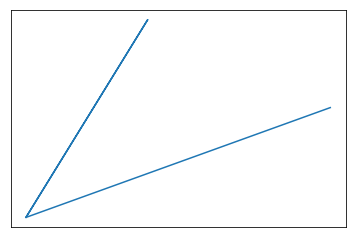

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
a=[0, 2, 0, 5]
b=[0,9, 0, 5]
plt.xticks([])
plt.yticks([])
plt.plot(a,b)
plt.show()

# Documentos representados como vectores:
## documentos:  A y  B

#  $$ cosine(\theta) = \frac{\vec{A} \cdot \vec{B}}{\lVert \vec{A} \rVert \lVert \vec{B} \rVert} =   \frac{ \sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}} $$

In [193]:
docs = (
"El cielo es azul",
"El sol es brillante",
"El sol en el cielo es brillante",
"Podemos ver el sol brillante, el sol brillante",
"Juan Luis ama a maria",
"Maria ama a Luis",
"la estrella de la mañana y la estrella del atardecer es la misma estrella",
"las estrellas del cielo y "
)


# Extracción de vocabulario

In [194]:
voc=[]
for d in docs:
    for t in d.split():
        voc.append(t.lower())
vocab=set(voc)
print(len(voc))
print(vocab)
print(len(vocab))

51
{'brillante', 'cielo', 'es', 'juan', 'las', 'ver', 'a', 'la', 'misma', 'sol', 'maria', 'el', 'azul', 'podemos', 'mañana', 'de', 'luis', 'atardecer', 'ama', 'y', 'en', 'estrellas', 'estrella', 'brillante,', 'del'}
25


# Vectorización de documentos

## Vocabulario
## "El cielo es azul"
##  <span style="color:green"> ['a', 'ama', 'atardecer', 'azul', 'brillante', 'cielo', 'de', 'del', ...] </span>
## Documento A 
##  <span style="color:darkblue"> [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] </span>
## Documento B 
## <span style="color:darkblue"> [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  </span>




In [195]:
vecs = []
#crear vector por documento
ind_voc=sorted(list(vocab))
for d in docs:
    v=[0]*len(ind_voc)
    for t in d.lower().split():
        k= ind_voc.index(t) 
        v[k]=1
    vecs.append(v)
        
print(vecs)



[[0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]]


# Cálculo similitud coseno

#  $$ cosine(\theta) = \frac{\vec{A} \cdot \vec{B}}{\lVert \vec{A} \rVert \lVert \vec{B} \rVert} =   \frac{ \sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}} $$

In [197]:

import math

d1= 0
d2 =1
A= vecs[d1]
B= vecs[d2]

s_ab = 0
aa = 0
bb = 0
for (x,y) in zip(A,B):
    s_ab = s_ab + x*y 
    aa = aa + x*x
    bb = bb + y*y

sim_cos = s_ab/(math.sqrt(aa)*math.sqrt(bb))

print(docs[d1])
print(docs[d2])
print(sim_cos)




El cielo es azul
El sol es brillante
0.5


# NLTK: Natural Language Tool Kit

In [ ]:
a="vimos los locos carros veloces en la pista de carreras"
b="El carro de carrera era muy veloz en la pista"


In [199]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Preprocesamiento Stemming

In [206]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer("spanish")
print(stemmer.stem("mesas"))
print(stemmer.stem("mesa"))
print(stemmer.stem("meses"))
print(stemmer.stem("mes"))


mes
mes
mes
mes


# Similitud + stemming

In [ ]:
# sim_AB= ?

In [211]:
from nltk.stem import SnowballStemmer
import re
stemmer=SnowballStemmer("spanish")
voc=[]
for d in docs:
    for t in d.lower().split():
        t= re.sub(r"[^a-z]", "", t)
        voc.append(stemmer.stem(t))
vocab=set(voc)

ind_voc=sorted(list(vocab))
print(ind_voc)
vecs = []
#crear vector por documento
for d in docs:
    v=[0]*len(ind_voc)
    for t in d.lower().split():
        t= re.sub(r"[^a-z]", "", t)
        k= ind_voc.index(stemmer.stem(t)) 
        v[k]=1
    vecs.append(v)
        
print(vecs)

['a', 'ama', 'atardec', 'azul', 'brillant', 'ciel', 'de', 'del', 'el', 'en', 'es', 'estrell', 'juan', 'la', 'las', 'luis', 'maan', 'mari', 'mism', 'pod', 'sol', 'ver', 'y']
[[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]]


In [215]:
import math

d1= 6
d2 =7
A= vecs[d1]
B= vecs[d2]

s_ab = 0
aa = 0
bb = 0
for (x,y) in zip(A,B):
    s_ab = s_ab + x*y 
    aa = aa + x*x
    bb = bb + y*y

sim_cos = s_ab/(math.sqrt(aa)*math.sqrt(bb))

print(docs[d1])
print(docs[d2])
print(ind_voc)
print(sim_cos)

la estrella de la mañana y la estrella del atardecer es la misma estrella
las estrellas del cielo y 
['a', 'ama', 'atardec', 'azul', 'brillant', 'ciel', 'de', 'del', 'el', 'en', 'es', 'estrell', 'juan', 'la', 'las', 'luis', 'maan', 'mari', 'mism', 'pod', 'sol', 'ver', 'y']
0.4472135954999579


In [217]:
from nltk.book import *

In [219]:
text2[:10]

['[',
 'Sense',
 'and',
 'Sensibility',
 'by',
 'Jane',
 'Austen',
 '1811',
 ']',
 'CHAPTER']

# Zipf  & Heaps